In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! mkdir ~/.kaggle #-,kaggle

In [3]:
! cp /content/drive/MyDrive/Colab\ Notebooks/kaggle_API_credentials/kaggle.json ~/.kaggle/


In [4]:
! kaggle datasets download tanlikesmath/diabetic-retinopathy-resized

100% 7.25G/7.25G [06:15<00:00, 20.1MB/s]
100% 7.25G/7.25G [06:15<00:00, 20.7MB/s]


In [5]:
!unzip diabetic-retinopathy-resized.zip

Streaming output truncated to the last 5000 lines.
  inflating: resized_train_cropped/resized_train_cropped/44260_right.jpeg  
  inflating: resized_train_cropped/resized_train_cropped/44261_left.jpeg  
  inflating: resized_train_cropped/resized_train_cropped/44261_right.jpeg  
  inflating: resized_train_cropped/resized_train_cropped/44262_left.jpeg  
  inflating: resized_train_cropped/resized_train_cropped/44262_right.jpeg  
  inflating: resized_train_cropped/resized_train_cropped/44263_left.jpeg  
  inflating: resized_train_cropped/resized_train_cropped/44263_right.jpeg  
  inflating: resized_train_cropped/resized_train_cropped/44264_left.jpeg  
  inflating: resized_train_cropped/resized_train_cropped/44264_right.jpeg  
  inflating: resized_train_cropped/resized_train_cropped/44265_left.jpeg  
  inflating: resized_train_cropped/resized_train_cropped/44265_right.jpeg  
  inflating: resized_train_cropped/resized_train_cropped/44267_left.jpeg  
  inflating: resized_train_cropped/resized_

In [6]:
import io
import os
import cv2
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob
import tensorflow as tf
from keras.utils import normalize, to_categorical
import shutil

plt.style.use("ggplot")
%matplotlib inline

In [7]:
csv_file      = 'trainLabels.csv'
dataset_path = os.path.join('/content','resized_train','resized_train')

In [8]:
df = pd.read_csv(csv_file)

In [9]:
df['level'].value_counts()

0    25810
2     5292
1     2443
3      873
4      708
Name: level, dtype: int64

In [11]:
def collect_random_dataset(dataset_path,csv_file,num_sample):

    #csv_file_path = os.path.join('eye_dataset',csv_file)
    data = pd.read_csv(csv_file)

    value_list = data['level'].value_counts().index.tolist()

    index_value = []

    for value in value_list:
        data_value = data[data['level'] == value].index
        index_value.append(data_value)

    full_index = []

    for indices in index_value:
        data_list = random.sample(indices.tolist(), num_sample)
        full_index.extend(data_list)

    random_data = data.iloc[full_index]

    image_ = []
    level_ = []

    for ind,(image,level) in random_data.iterrows():
        image_path = os.path.join(dataset_path,f'{image}.jpeg')
        image_.append(image_path)
        level_.append(level)

    return image_,level_

In [12]:
image,level = collect_random_dataset(dataset_path,csv_file,num_sample=708)

In [13]:
image

['/content/resized_train/resized_train/39351_left.jpeg',
 '/content/resized_train/resized_train/5525_left.jpeg',
 '/content/resized_train/resized_train/26046_right.jpeg',
 '/content/resized_train/resized_train/2450_right.jpeg',
 '/content/resized_train/resized_train/2556_left.jpeg',
 '/content/resized_train/resized_train/21772_right.jpeg',
 '/content/resized_train/resized_train/20295_left.jpeg',
 '/content/resized_train/resized_train/28351_left.jpeg',
 '/content/resized_train/resized_train/44141_right.jpeg',
 '/content/resized_train/resized_train/19888_right.jpeg',
 '/content/resized_train/resized_train/19729_right.jpeg',
 '/content/resized_train/resized_train/30527_left.jpeg',
 '/content/resized_train/resized_train/41332_left.jpeg',
 '/content/resized_train/resized_train/28548_right.jpeg',
 '/content/resized_train/resized_train/33768_left.jpeg',
 '/content/resized_train/resized_train/8321_right.jpeg',
 '/content/resized_train/resized_train/11520_left.jpeg',
 '/content/resized_train/re

In [14]:
level

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [15]:
def convert_into_array(image,level):
    level = np.array(level,dtype=float)
    level = to_categorical(level,num_classes=5)
    #file = tf.squeeze(file,axis=0)
    return image,level

In [16]:
image_path,level = convert_into_array(image,level)

In [17]:
def Normalization(image,level):

    image   = tf.image.resize(image,(256,256))
    mean_per_channel = tf.reduce_mean(image, axis=(0, 1))
    std_per_channel  = tf.math.reduce_std(image,axis=(0,1))

    epsilon = 1e-8
    std_per_channel = tf.maximum(std_per_channel, epsilon)

    # Normalize each channel by subtracting its respective channel mean from each pixel value
    normalized_rgb_image = image - mean_per_channel
    normalized_rgb_image = normalized_rgb_image/std_per_channel

    return normalized_rgb_image,level

In [18]:
def preprocess(image_path, level):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, (256, 256))  # Adjust dimensions
    image = image / 255.0  # Normalize pixel values

    nor_image,level = Normalization(image,level)
    return nor_image, level

In [19]:
data = tf.data.Dataset.from_tensor_slices((image_path, level))
data = data.shuffle(buffer_size=12452)
data = data.map(preprocess)
data = data.batch(32)
data = data.prefetch(tf.data.AUTOTUNE)

In [20]:
sample = data.as_numpy_iterator().next()

In [21]:
sample[0].shape

(32, 256, 256, 3)

In [23]:
len(data)

111

In [26]:
train_data = data.take(77)
test_data_  = data.skip(77)

In [33]:
test_data = test_data_.take(30)
val_data  = test_data_.skip(30)

In [36]:
from tensorflow.keras import Input
from tensorflow.keras.models import Model, load_model, save_model
from tensorflow.keras.layers import Input, Activation, BatchNormalization, Dropout, Lambda, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate,Conv2D,Dense,Flatten
from tensorflow.keras.optimizers import Adam,Adadelta,RMSprop
from tensorflow.keras.metrics import MeanIoU
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint,LearningRateScheduler
from tensorflow.keras import backend as K
from tensorflow.keras import Sequential
from tensorflow.keras.applications.vgg19 import VGG19

In [37]:
early_stop    = EarlyStopping(monitor='val_loss',patience=25,verbose=1)
checkpoint_cb = ModelCheckpoint("resnet_tunned.h5",save_best_only=True)

In [38]:
def scheduler(epoch, lr):
    if epoch < 5:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

In [39]:
schedule_callback = LearningRateScheduler(scheduler)

In [42]:
def f1_score(y_true, y_pred):
    y_pred = tf.round(y_pred)  # Convert probabilities to binary predictions
    true_positives = tf.reduce_sum(y_true * y_pred, axis=0)
    predicted_positives = tf.reduce_sum(y_pred, axis=0)
    actual_positives = tf.reduce_sum(y_true, axis=0)

    precision = true_positives / (predicted_positives + tf.keras.backend.epsilon())
    recall = true_positives / (actual_positives + tf.keras.backend.epsilon())

    f1 = 2 * ((precision * recall) / (precision + recall + tf.keras.backend.epsilon()))
    f1 = tf.where(tf.math.is_nan(f1), tf.zeros_like(f1), f1)  # Handle NaN values
    return tf.reduce_mean(f1)

In [43]:
model = load_model('/content/drive/MyDrive/Colab Notebooks/Resnet50_64%_rms.h5',custom_objects={'f1_score':f1_score})

# Compile the model
optimizer = RMSprop(learning_rate=0.001, centered=True)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy','AUC' ])


In [44]:
history = model.fit(train_data,validation_data=test_data,epochs=50,
                    callbacks=[early_stop,checkpoint_cb,schedule_callback])

Epoch 1/50
77/77 [==============================] - 20s 82ms/step - loss: 1.5522 - accuracy: 0.4513 - auc: 0.7667 - val_loss: 2.1882 - val_accuracy: 0.4375 - val_auc: 0.7518 - lr: 0.0010
Epoch 2/50
77/77 [==============================] - 5s 61ms/step - loss: 1.4890 - accuracy: 0.4383 - auc: 0.7617 - val_loss: 2.6160 - val_accuracy: 0.4073 - val_auc: 0.7033 - lr: 0.0010
Epoch 3/50
77/77 [==============================] - 5s 66ms/step - loss: 1.3795 - accuracy: 0.4407 - auc: 0.7732 - val_loss: 1.1426 - val_accuracy: 0.5437 - val_auc: 0.8353 - lr: 0.0010
Epoch 4/50
77/77 [==============================] - 5s 64ms/step - loss: 1.3209 - accuracy: 0.4399 - auc: 0.7770 - val_loss: 1.2812 - val_accuracy: 0.4396 - val_auc: 0.7852 - lr: 0.0010
Epoch 5/50
77/77 [==============================] - 5s 62ms/step - loss: 1.3078 - accuracy: 0.4432 - auc: 0.7776 - val_loss: 1.2362 - val_accuracy: 0.4958 - val_auc: 0.8099 - lr: 0.0010
Epoch 6/50
77/77 [==============================] - 5s 60ms/step - lo

In [47]:
hyper_tuned = pd.DataFrame(history.history)

In [49]:
history_1 = model.fit(train_data,validation_data=test_data,epochs=100,
                    callbacks=[early_stop,checkpoint_cb,schedule_callback])

Epoch 1/100
77/77 [==============================] - 5s 68ms/step - loss: 1.0413 - accuracy: 0.5426 - auc: 0.8542 - val_loss: 0.7935 - val_accuracy: 0.6875 - val_auc: 0.9307 - lr: 1.1109e-05
Epoch 2/100
77/77 [==============================] - 5s 62ms/step - loss: 1.0270 - accuracy: 0.5532 - auc: 0.8588 - val_loss: 0.8212 - val_accuracy: 0.6865 - val_auc: 0.9252 - lr: 1.1109e-05
Epoch 3/100
77/77 [==============================] - 5s 60ms/step - loss: 1.0363 - accuracy: 0.5495 - auc: 0.8570 - val_loss: 0.8172 - val_accuracy: 0.6552 - val_auc: 0.9216 - lr: 1.1109e-05
Epoch 4/100
77/77 [==============================] - 5s 62ms/step - loss: 1.0468 - accuracy: 0.5284 - auc: 0.8505 - val_loss: 0.8008 - val_accuracy: 0.6740 - val_auc: 0.9281 - lr: 1.1109e-05
Epoch 5/100
77/77 [==============================] - 5s 63ms/step - loss: 1.0467 - accuracy: 0.5422 - auc: 0.8524 - val_loss: 0.8286 - val_accuracy: 0.6656 - val_auc: 0.9218 - lr: 1.1109e-05
Epoch 6/100
77/77 [==========================

In [52]:
def plot_model_perfomance(model):
    history_post_training = model.history

    train_loss = history_post_training['loss']
    test_loss = history_post_training['val_loss']

    train_accuracy = history_post_training['accuracy']
    test_accuracy = history_post_training['val_accuracy']

    train_AUC = history_post_training['auc']
    test_AUC = history_post_training['val_auc']

    plt.figure(1)
    plt.plot(train_loss, 'b-')
    plt.plot(test_loss, 'r-')
    plt.xlabel('iterations')
    plt.ylabel('loss')
    plt.title('loss graph', fontsize=12)
    plt.legend(['train','test'])
    plt.savefig('Vgg19_loss.png')


    plt.figure(2)
    plt.plot(train_accuracy, 'b-')
    plt.plot(test_accuracy, 'r-')

    plt.xlabel('iterations')
    plt.ylabel('accuracy')
    plt.title('Accuracy graph', fontsize=12)
    plt.legend(['train','test'])
    plt.savefig('Vgg19_accuracy.png')

    plt.figure(3)
    plt.plot(train_AUC, 'b-')
    plt.plot(test_AUC, 'r-')

    plt.xlabel('iterations')
    plt.ylabel('AUC')
    plt.title('AUC', fontsize=12)
    plt.legend(['train','test'])
    plt.savefig('Vgg19_auc.png')

    plt.show()

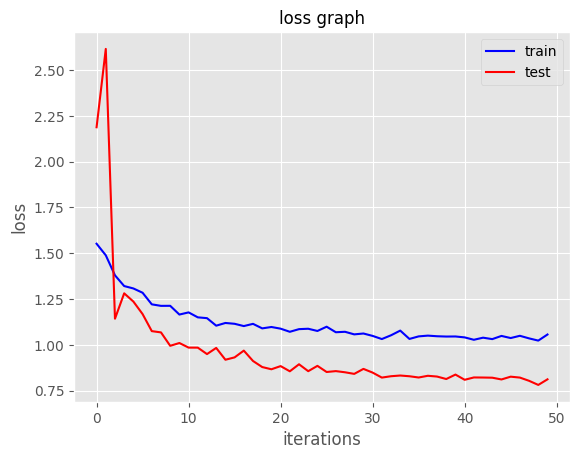

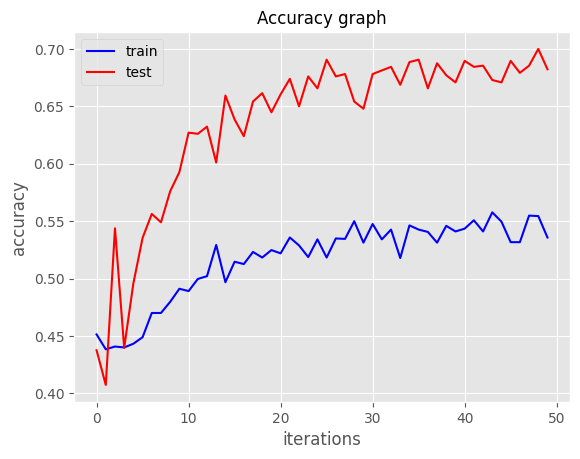

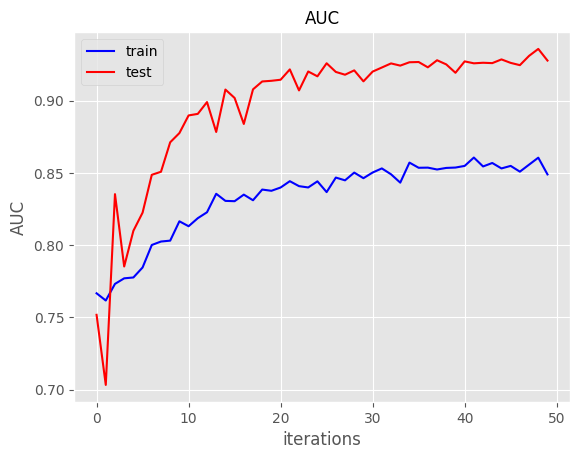

In [53]:
plot_model_perfomance(history)

In [54]:
model.get_metrics_result()

{'loss': <tf.Tensor: shape=(), dtype=float32, numpy=0.8292764>,
 'accuracy': <tf.Tensor: shape=(), dtype=float32, numpy=0.675>,
 'auc': <tf.Tensor: shape=(), dtype=float32, numpy=0.9212926>}

In [60]:
print(f'loss of resnet50 model is {model.get_metrics_result()["loss"].numpy()}')
print(f'accuracy of resnet50 model is {model.get_metrics_result()["accuracy"].numpy()}')
print(f'AUC of resnet50 model is {model.get_metrics_result()["auc"].numpy()}')

loss of resnet50 model is 0.8292763829231262
accuracy of resnet50 model is 0.675000011920929
AUC of resnet50 model is 0.9212926030158997


## Plot confusion metrics

In [61]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

### Vgg19

In [62]:
val_sample = val_data.as_numpy_iterator().next()

In [63]:
y_true = np.argmax(val_sample[1],axis=1)
y_pred = np.argmax((model.predict(val_sample[0])),axis=1)

1/1 [==============================] - 1s 954ms/step


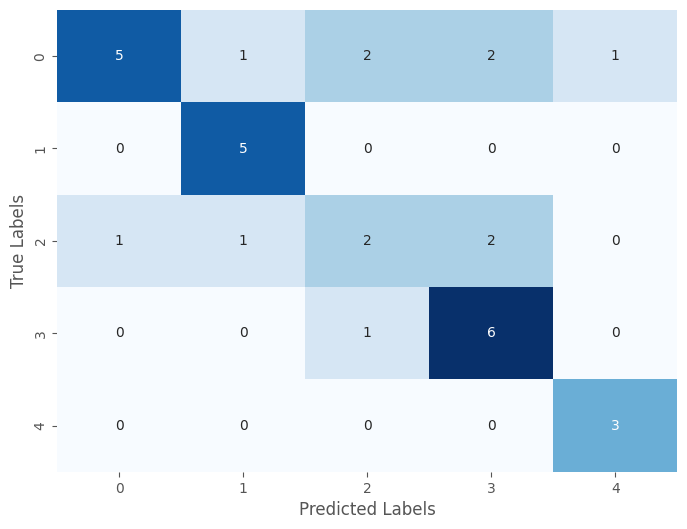

In [64]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('confusion_matrix.png')
plt.show()

## Classification Report

In [65]:
class_names = [0,1,2,3,4]

In [66]:
from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred)#, target_names=class_names)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.45      0.59        11
           1       0.71      1.00      0.83         5
           2       0.40      0.33      0.36         6
           3       0.60      0.86      0.71         7
           4       0.75      1.00      0.86         3

    accuracy                           0.66        32
   macro avg       0.66      0.73      0.67        32
weighted avg       0.67      0.66      0.64        32



## Save resnet50 model

In [67]:
# save weights
model.save('res.h5')

## kappa score

In [68]:
from sklearn.metrics import cohen_kappa_score

# Assuming 'true_labels' are the true labels and 'predicted_labels' are the predicted labels
y_true = np.argmax(val_sample[1],axis=1)
y_pred = np.argmax((model.predict(val_sample[0])),axis=1)

kappa = cohen_kappa_score(y_true, y_pred)
print(f'Kappa Score: {kappa}')

1/1 [==============================] - 0s 50ms/step
Kappa Score: 0.5659679408138101
